In [1]:
import numpy as np
import pandas
import folium
import pandas as pd
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns


In [2]:
#read tables
data_point_path = "ddf--gapminder--systema_globalis/ddf--datapoints--"
entity_path = "ddf--gapminder--systema_globalis/ddf--entities--"
gdp_table = pd.read_csv(data_point_path + "gdp_per_capita_yearly_growth--by--geo--time.csv")
country_table = pd.read_csv(entity_path + "geo--country.csv")

In [3]:
gdp_table = gdp_table.rename(columns={"geo": "country"})

In [4]:
raw = pd.merge(gdp_table, country_table, on='country', how='left')
raw = raw.rename(columns={"gdp_per_capita_yearly_growth": "GDP", 
                          "time": "Year", 
                          "name": "Name",
                          "world_4region": "Continent"})
raw.head(5)

,country,Year,GDP,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,...,latitude,longitude,main_religion_2008,Name,pandg,un_state,unicode_region_subtag,upper_case_name,Continent,world_6region
0,abw,1801,0.0,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,...,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
1,abw,1802,0.0,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,...,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,abw,1803,0.0,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,...,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
3,abw,1804,0.0,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,...,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
4,abw,1805,0.0,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,...,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america


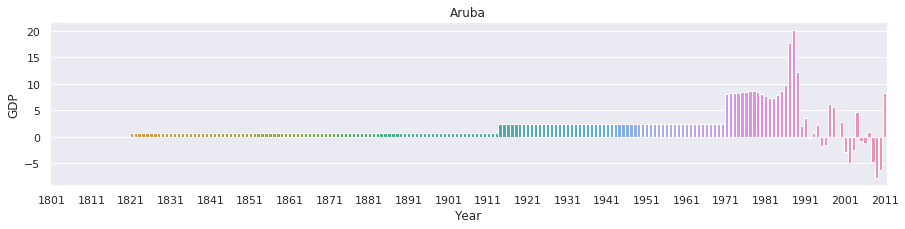

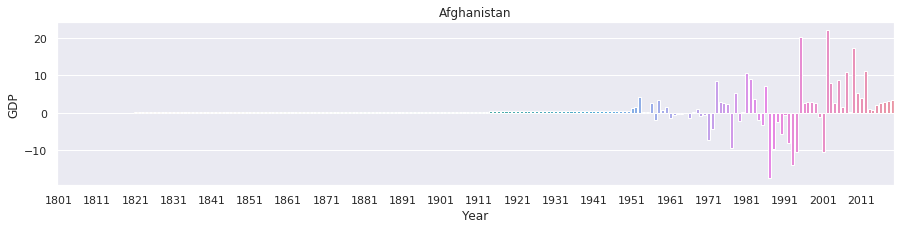

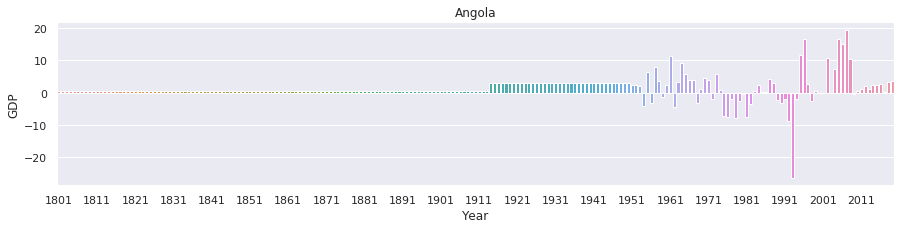

In [5]:
sns.set(rc={'figure.figsize':(15,3)})
for country in list(raw["Name"].unique())[0:3]:
    ax = sns.barplot(x="Year", y="GDP", data=raw[raw["Name"] == country])
    ax.set_title(country)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.show()


In [6]:
continent_gdp = raw[["Year", "Continent", "GDP"]]\
    .groupby(["Year", "Continent"]).mean().reset_index()
continent_gdp.head()

,Year,Continent,GDP
0,1801,africa,0.056062
1,1801,americas,0.063826
2,1801,asia,0.012842
3,1801,europe,0.093030
4,1802,africa,0.056062


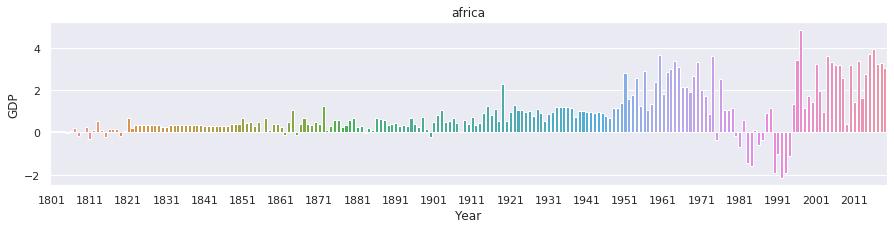

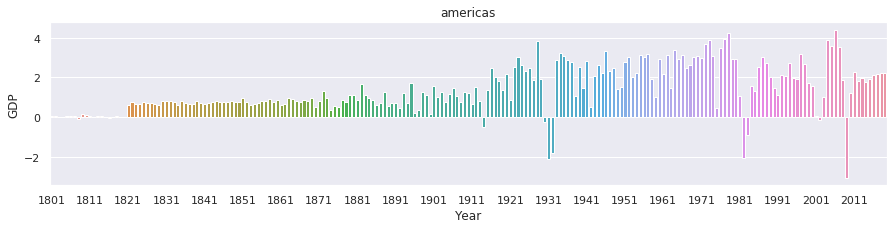

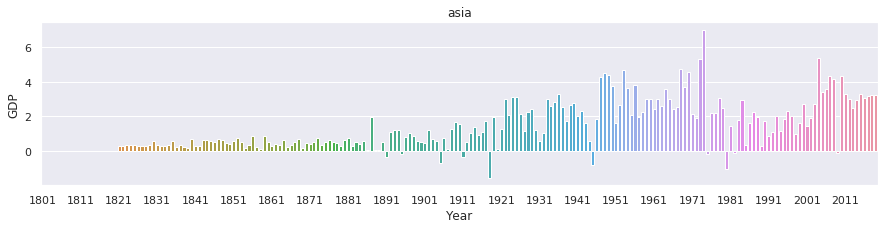

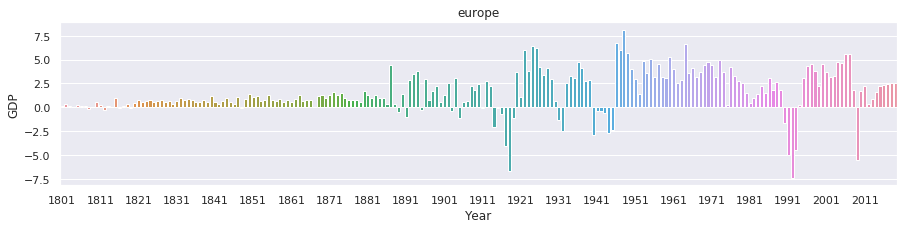

In [7]:
sns.set(rc={'figure.figsize':(15,3)})
for continent in list(continent_gdp["Continent"].unique()):
    ax = sns.barplot(x="Year", y="GDP",\
                     data=continent_gdp[continent_gdp["Continent"] == continent])
    ax.set_title(continent)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.show()
